In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
n_sensors = 10
#n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [5]:
x_csv = x_csv.to_numpy(dtype='float32')

In [6]:
x_5degree = x_csv[:, 5:15]

In [7]:
x_5degree.shape

(438, 10)

In [8]:
x = x_5degree.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [11]:
y = y_5degree.reshape((73*6, 100, 100))

In [12]:
tsr = x_csv[:, -2]

In [13]:
theta = x_csv[:, -1]

In [14]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [15]:
print(y_train.shape)

(394, 100, 100)


In [16]:
print(y_test.shape)

(44, 100, 100)


In [17]:
print(x_train.shape)

(394, 10, 1)


In [18]:
print(x_test.shape)

(44, 10, 1)


In [19]:
theta_train

array([ 40., 165.,  55., 325.,  20., 155.,  90.,  75.,  75., 265.,   0.,
        95., 305., 350., 280.,   5., 245., 100., 185., 330., 325.,  30.,
       125.,   0., 255., 200., 210.,  95., 250., 230., 100., 255.,  65.,
       110., 230.,  85., 130., 215., 300., 285., 320., 120.,  85., 330.,
       230., 205., 155.,  55.,  65., 135., 105.,  40., 320.,  30., 315.,
       265., 270.,  25., 225.,  10., 315.,  60., 280.,  80., 195., 220.,
       220.,  15.,  90., 110., 300., 110., 320., 315., 185., 290., 330.,
       145., 335., 325.,  50., 130.,  35., 150., 160., 175., 130., 215.,
       225., 205., 340., 315., 160., 210., 260., 305., 120., 145., 300.,
       170., 265., 180., 330., 360.,  90.,  80., 165.,  50., 210., 130.,
         5., 295., 110., 230., 245., 115., 235., 140., 310., 245.,  45.,
       220.,  15., 180., 330., 140., 190., 100., 170., 295., 190., 250.,
       310.,  30., 120.,  50.,  60.,  20., 155.,  50.,  60., 150.,  40.,
       150., 275., 105., 225., 200., 150.,  60., 32

In [20]:
tsr_train

array([1.7, 1.5, 1.7, 1.9, 1.6, 1.8, 2. , 1.5, 2. , 1.6, 1.5, 1.5, 1.8,
       1.8, 1.5, 1.8, 1.9, 1.6, 1.9, 1.8, 1.8, 2. , 1.5, 2. , 2. , 1.6,
       1.5, 1.7, 2. , 2. , 1.9, 1.6, 1.9, 1.5, 1.5, 1.6, 1.8, 1.6, 2. ,
       1.5, 1.6, 1.5, 1.5, 1.5, 1.8, 2. , 1.5, 1.6, 2. , 1.7, 1.6, 1.8,
       2. , 1.7, 1.9, 1.8, 2. , 1.5, 1.5, 1.7, 2. , 2. , 1.8, 1.5, 2. ,
       1.6, 2. , 1.5, 1.5, 1.7, 1.5, 1.9, 1.9, 1.5, 1.6, 1.8, 1.9, 1.5,
       1.6, 1.7, 1.8, 1.5, 1.5, 1.7, 2. , 1.6, 1.9, 2. , 1.6, 1.6, 1.6,
       1.7, 1.9, 1.9, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.6,
       1.8, 2. , 2. , 1.6, 2. , 1.7, 1.6, 1.9, 2. , 1.6, 2. , 2. , 1.7,
       1.8, 1.8, 1.7, 1.9, 1.9, 1.8, 1.5, 1.6, 1.9, 1.7, 1.8, 1.8, 1.5,
       1.6, 1.7, 1.7, 1.5, 1.9, 1.9, 1.7, 1.7, 1.7, 1.5, 1.8, 1.6, 1.6,
       1.8, 1.8, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.7, 1.7,
       1.7, 1.5, 1.6, 1.5, 2. , 1.6, 1.9, 1.6, 1.6, 1.9, 1.8, 1.6, 2. ,
       1.5, 1.5, 1.5, 1.6, 1.6, 2. , 1.7, 1.7, 1.5, 2. , 1.8, 2.

In [21]:
os.chdir('C:\\Users\\User')

In [22]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [23]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 10)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               5632      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [24]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 6ms/step - loss: 0.0110 - rmse: 0.1041
Epoch 2/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1035
Epoch 3/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.1028
Epoch 4/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0105 - rmse: 0.1016
Epoch 5/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0100 - rmse: 0.0991
Epoch 6/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0090 - rmse: 0.0938
Epoch 7/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0872
Epoch 8/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0846
Epoch 9/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0836
Epoch 10/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0832
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0471
Epoch 85/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0467
Epoch 86/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0462
Epoch 87/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0458
Epoch 88/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0454
Epoch 89/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0450
Epoch 90/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0446
Epoch 91/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0442
Epoch 92/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0439
Epoch 93/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 5ms/step - loss: 6.6797e-04 - rmse: 0.0225
Epoch 166/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5569e-04 - rmse: 0.0222
Epoch 167/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4820e-04 - rmse: 0.0220
Epoch 168/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4151e-04 - rmse: 0.0219
Epoch 169/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3003e-04 - rmse: 0.0216
Epoch 170/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2260e-04 - rmse: 0.0215
Epoch 171/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1355e-04 - rmse: 0.0212
Epoch 172/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0850e-04 - rmse: 0.0211
Epoch 173/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9892e-04 - rmse: 0.0209
Epoch 174/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9554e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 3.3123e-04 - rmse: 0.0131
Epoch 245/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2927e-04 - rmse: 0.0131
Epoch 246/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2677e-04 - rmse: 0.0130
Epoch 247/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2597e-04 - rmse: 0.0129
Epoch 248/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2405e-04 - rmse: 0.0129
Epoch 249/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2234e-04 - rmse: 0.0128
Epoch 250/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2024e-04 - rmse: 0.0127
Epoch 251/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1803e-04 - rmse: 0.0126
Epoch 252/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1732e-04 - rmse: 0.0126
Epoch 253/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1538e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 2.4748e-04 - rmse: 0.0098
Epoch 324/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4625e-04 - rmse: 0.0097
Epoch 325/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4555e-04 - rmse: 0.0097
Epoch 326/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4530e-04 - rmse: 0.0097
Epoch 327/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4497e-04 - rmse: 0.0097
Epoch 328/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4431e-04 - rmse: 0.0096
Epoch 329/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4377e-04 - rmse: 0.0096
Epoch 330/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4310e-04 - rmse: 0.0096
Epoch 331/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4197e-04 - rmse: 0.0095
Epoch 332/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4129e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.0707e-04 - rmse: 0.0080
Epoch 403/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0709e-04 - rmse: 0.0080
Epoch 404/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0624e-04 - rmse: 0.0079
Epoch 405/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0616e-04 - rmse: 0.0079
Epoch 406/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0584e-04 - rmse: 0.0079
Epoch 407/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0527e-04 - rmse: 0.0079
Epoch 408/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0496e-04 - rmse: 0.0079
Epoch 409/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0503e-04 - rmse: 0.0079
Epoch 410/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0498e-04 - rmse: 0.0079
Epoch 411/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0495e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.8095e-04 - rmse: 0.0067
Epoch 482/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8068e-04 - rmse: 0.0067
Epoch 483/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8042e-04 - rmse: 0.0067
Epoch 484/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8024e-04 - rmse: 0.0067
Epoch 485/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8001e-04 - rmse: 0.0067
Epoch 486/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7924e-04 - rmse: 0.0066
Epoch 487/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7976e-04 - rmse: 0.0067
Epoch 488/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7941e-04 - rmse: 0.0067
Epoch 489/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7932e-04 - rmse: 0.0067
Epoch 490/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7871e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 1.6196e-04 - rmse: 0.0058
Epoch 561/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6181e-04 - rmse: 0.0058
Epoch 562/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6173e-04 - rmse: 0.0058
Epoch 563/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6097e-04 - rmse: 0.0058
Epoch 564/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6057e-04 - rmse: 0.0057
Epoch 565/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6069e-04 - rmse: 0.0058
Epoch 566/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6013e-04 - rmse: 0.0057
Epoch 567/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5970e-04 - rmse: 0.0057
Epoch 568/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6003e-04 - rmse: 0.0057
Epoch 569/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5991e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 1.4722e-04 - rmse: 0.0052
Epoch 640/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4674e-04 - rmse: 0.0052
Epoch 641/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4620e-04 - rmse: 0.0051
Epoch 642/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4608e-04 - rmse: 0.0051
Epoch 643/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4600e-04 - rmse: 0.0051
Epoch 644/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4581e-04 - rmse: 0.0051
Epoch 645/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4572e-04 - rmse: 0.0051
Epoch 646/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4568e-04 - rmse: 0.0051
Epoch 647/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4597e-04 - rmse: 0.0051
Epoch 648/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4581e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 1.3523e-04 - rmse: 0.0047
Epoch 719/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3535e-04 - rmse: 0.0047
Epoch 720/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3513e-04 - rmse: 0.0047
Epoch 721/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3463e-04 - rmse: 0.0047
Epoch 722/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3437e-04 - rmse: 0.0047
Epoch 723/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3415e-04 - rmse: 0.0046
Epoch 724/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3406e-04 - rmse: 0.0046
Epoch 725/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3382e-04 - rmse: 0.0046
Epoch 726/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3358e-04 - rmse: 0.0046
Epoch 727/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3353e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.2543e-04 - rmse: 0.0044
Epoch 798/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2556e-04 - rmse: 0.0044
Epoch 799/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2562e-04 - rmse: 0.0044
Epoch 800/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2495e-04 - rmse: 0.0043
Epoch 801/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2461e-04 - rmse: 0.0043
Epoch 802/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2433e-04 - rmse: 0.0043
Epoch 803/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2423e-04 - rmse: 0.0043
Epoch 804/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2450e-04 - rmse: 0.0043
Epoch 805/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2438e-04 - rmse: 0.0043
Epoch 806/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2443e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 1.1663e-04 - rmse: 0.0041
Epoch 877/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1640e-04 - rmse: 0.0040
Epoch 878/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1642e-04 - rmse: 0.0041
Epoch 879/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1622e-04 - rmse: 0.0040
Epoch 880/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1620e-04 - rmse: 0.0040
Epoch 881/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1675e-04 - rmse: 0.0041
Epoch 882/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1634e-04 - rmse: 0.0041
Epoch 883/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1649e-04 - rmse: 0.0041
Epoch 884/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1655e-04 - rmse: 0.0041
Epoch 885/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1674e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 1.0980e-04 - rmse: 0.0039
Epoch 956/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0951e-04 - rmse: 0.0039
Epoch 957/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0923e-04 - rmse: 0.0039
Epoch 958/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0904e-04 - rmse: 0.0038
Epoch 959/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0891e-04 - rmse: 0.0038
Epoch 960/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0887e-04 - rmse: 0.0038
Epoch 961/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0894e-04 - rmse: 0.0038
Epoch 962/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0887e-04 - rmse: 0.0038
Epoch 963/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0886e-04 - rmse: 0.0039
Epoch 964/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0861e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 1.0262e-04 - rmse: 0.0036
Epoch 1035/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0257e-04 - rmse: 0.0036
Epoch 1036/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0256e-04 - rmse: 0.0037
Epoch 1037/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0257e-04 - rmse: 0.0037
Epoch 1038/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0244e-04 - rmse: 0.0037
Epoch 1039/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0230e-04 - rmse: 0.0036
Epoch 1040/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0202e-04 - rmse: 0.0036
Epoch 1041/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0210e-04 - rmse: 0.0036
Epoch 1042/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0222e-04 - rmse: 0.0037
Epoch 1043/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 9.6905e-05 - rmse: 0.0035
Epoch 1113/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.7015e-05 - rmse: 0.0035
Epoch 1114/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.6608e-05 - rmse: 0.0035
Epoch 1115/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.6476e-05 - rmse: 0.0035
Epoch 1116/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.6419e-05 - rmse: 0.0035
Epoch 1117/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.6459e-05 - rmse: 0.0035
Epoch 1118/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.6236e-05 - rmse: 0.0034
Epoch 1119/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.6118e-05 - rmse: 0.0034
Epoch 1120/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6164e-05 - rmse: 0.0035
Epoch 1121/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6

10/10 [==============================] - 0s 5ms/step - loss: 9.2042e-05 - rmse: 0.0034
Epoch 1191/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1957e-05 - rmse: 0.0034
Epoch 1192/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1833e-05 - rmse: 0.0034
Epoch 1193/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1707e-05 - rmse: 0.0034
Epoch 1194/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1607e-05 - rmse: 0.0034
Epoch 1195/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1420e-05 - rmse: 0.0034
Epoch 1196/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1252e-05 - rmse: 0.0033
Epoch 1197/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1070e-05 - rmse: 0.0033
Epoch 1198/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1064e-05 - rmse: 0.0033
Epoch 1199/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.0

10/10 [==============================] - 0s 6ms/step - loss: 8.6951e-05 - rmse: 0.0032
Epoch 1269/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6968e-05 - rmse: 0.0032
Epoch 1270/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6700e-05 - rmse: 0.0032
Epoch 1271/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6490e-05 - rmse: 0.0032
Epoch 1272/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6485e-05 - rmse: 0.0032
Epoch 1273/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6699e-05 - rmse: 0.0032
Epoch 1274/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6624e-05 - rmse: 0.0032
Epoch 1275/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6563e-05 - rmse: 0.0032
Epoch 1276/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6615e-05 - rmse: 0.0032
Epoch 1277/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6

10/10 [==============================] - 0s 5ms/step - loss: 8.2654e-05 - rmse: 0.0031
Epoch 1347/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2835e-05 - rmse: 0.0032
Epoch 1348/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2983e-05 - rmse: 0.0032
Epoch 1349/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2744e-05 - rmse: 0.0032
Epoch 1350/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2793e-05 - rmse: 0.0032
Epoch 1351/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2692e-05 - rmse: 0.0032
Epoch 1352/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2503e-05 - rmse: 0.0031
Epoch 1353/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2454e-05 - rmse: 0.0031
Epoch 1354/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2560e-05 - rmse: 0.0032
Epoch 1355/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 7.8749e-05 - rmse: 0.0030
Epoch 1425/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8866e-05 - rmse: 0.0030
Epoch 1426/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9013e-05 - rmse: 0.0031
Epoch 1427/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8847e-05 - rmse: 0.0031
Epoch 1428/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8754e-05 - rmse: 0.0030
Epoch 1429/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8737e-05 - rmse: 0.0030
Epoch 1430/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8526e-05 - rmse: 0.0030
Epoch 1431/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8402e-05 - rmse: 0.0030
Epoch 1432/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8477e-05 - rmse: 0.0030
Epoch 1433/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8

10/10 [==============================] - 0s 5ms/step - loss: 7.5620e-05 - rmse: 0.0030
Epoch 1503/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5436e-05 - rmse: 0.0030
Epoch 1504/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5378e-05 - rmse: 0.0030
Epoch 1505/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5067e-05 - rmse: 0.0029
Epoch 1506/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5091e-05 - rmse: 0.0029
Epoch 1507/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4978e-05 - rmse: 0.0029
Epoch 1508/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4982e-05 - rmse: 0.0029
Epoch 1509/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4752e-05 - rmse: 0.0029
Epoch 1510/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4620e-05 - rmse: 0.0029
Epoch 1511/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4

10/10 [==============================] - 0s 5ms/step - loss: 7.2301e-05 - rmse: 0.0029
Epoch 1581/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1982e-05 - rmse: 0.0029
Epoch 1582/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2028e-05 - rmse: 0.0029
Epoch 1583/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1939e-05 - rmse: 0.0029
Epoch 1584/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1724e-05 - rmse: 0.0028
Epoch 1585/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1734e-05 - rmse: 0.0028
Epoch 1586/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1685e-05 - rmse: 0.0028
Epoch 1587/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1590e-05 - rmse: 0.0028
Epoch 1588/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1655e-05 - rmse: 0.0028
Epoch 1589/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1

10/10 [==============================] - 0s 6ms/step - loss: 6.9186e-05 - rmse: 0.0028
Epoch 1659/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9143e-05 - rmse: 0.0028
Epoch 1660/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9070e-05 - rmse: 0.0028
Epoch 1661/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8862e-05 - rmse: 0.0028
Epoch 1662/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8765e-05 - rmse: 0.0027
Epoch 1663/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8988e-05 - rmse: 0.0028
Epoch 1664/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8784e-05 - rmse: 0.0028
Epoch 1665/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8880e-05 - rmse: 0.0028
Epoch 1666/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8889e-05 - rmse: 0.0028
Epoch 1667/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8

10/10 [==============================] - 0s 6ms/step - loss: 6.6478e-05 - rmse: 0.0027
Epoch 1737/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6372e-05 - rmse: 0.0027
Epoch 1738/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6370e-05 - rmse: 0.0027
Epoch 1739/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6412e-05 - rmse: 0.0027
Epoch 1740/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6602e-05 - rmse: 0.0028
Epoch 1741/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6474e-05 - rmse: 0.0028
Epoch 1742/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6528e-05 - rmse: 0.0028
Epoch 1743/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6815e-05 - rmse: 0.0028
Epoch 1744/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6933e-05 - rmse: 0.0029
Epoch 1745/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6

10/10 [==============================] - 0s 5ms/step - loss: 6.4073e-05 - rmse: 0.0027
Epoch 1815/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4002e-05 - rmse: 0.0027
Epoch 1816/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4012e-05 - rmse: 0.0027
Epoch 1817/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4035e-05 - rmse: 0.0027
Epoch 1818/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3780e-05 - rmse: 0.0027
Epoch 1819/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3742e-05 - rmse: 0.0027
Epoch 1820/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3731e-05 - rmse: 0.0027
Epoch 1821/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3769e-05 - rmse: 0.0027
Epoch 1822/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4048e-05 - rmse: 0.0027
Epoch 1823/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4

10/10 [==============================] - 0s 5ms/step - loss: 6.1888e-05 - rmse: 0.0027
Epoch 1893/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1866e-05 - rmse: 0.0027
Epoch 1894/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1987e-05 - rmse: 0.0027
Epoch 1895/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2079e-05 - rmse: 0.0027
Epoch 1896/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1609e-05 - rmse: 0.0026
Epoch 1897/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1530e-05 - rmse: 0.0026
Epoch 1898/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1427e-05 - rmse: 0.0026
Epoch 1899/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1423e-05 - rmse: 0.0026
Epoch 1900/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1466e-05 - rmse: 0.0026
Epoch 1901/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1

10/10 [==============================] - 0s 6ms/step - loss: 5.9821e-05 - rmse: 0.0026
Epoch 1971/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9576e-05 - rmse: 0.0026
Epoch 1972/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9627e-05 - rmse: 0.0026
Epoch 1973/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9482e-05 - rmse: 0.0026
Epoch 1974/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9260e-05 - rmse: 0.0025
Epoch 1975/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9266e-05 - rmse: 0.0025
Epoch 1976/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9328e-05 - rmse: 0.0025
Epoch 1977/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9300e-05 - rmse: 0.0025
Epoch 1978/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9466e-05 - rmse: 0.0026
Epoch 1979/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 5.7679e-05 - rmse: 0.0025
Epoch 2049/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7779e-05 - rmse: 0.0026
Epoch 2050/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7703e-05 - rmse: 0.0025
Epoch 2051/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7695e-05 - rmse: 0.0026
Epoch 2052/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7630e-05 - rmse: 0.0025
Epoch 2053/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7607e-05 - rmse: 0.0025
Epoch 2054/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7395e-05 - rmse: 0.0025
Epoch 2055/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7289e-05 - rmse: 0.0025
Epoch 2056/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7268e-05 - rmse: 0.0025
Epoch 2057/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7

10/10 [==============================] - 0s 5ms/step - loss: 5.5974e-05 - rmse: 0.0025
Epoch 2127/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6023e-05 - rmse: 0.0025
Epoch 2128/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6114e-05 - rmse: 0.0026
Epoch 2129/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6072e-05 - rmse: 0.0025
Epoch 2130/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5812e-05 - rmse: 0.0025
Epoch 2131/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5678e-05 - rmse: 0.0025
Epoch 2132/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5592e-05 - rmse: 0.0025
Epoch 2133/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5634e-05 - rmse: 0.0025
Epoch 2134/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5573e-05 - rmse: 0.0025
Epoch 2135/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5

10/10 [==============================] - 0s 5ms/step - loss: 5.4068e-05 - rmse: 0.0024
Epoch 2205/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3953e-05 - rmse: 0.0024
Epoch 2206/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3814e-05 - rmse: 0.0024
Epoch 2207/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3774e-05 - rmse: 0.0024
Epoch 2208/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3846e-05 - rmse: 0.0024
Epoch 2209/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3856e-05 - rmse: 0.0024
Epoch 2210/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3908e-05 - rmse: 0.0024
Epoch 2211/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3925e-05 - rmse: 0.0024
Epoch 2212/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3983e-05 - rmse: 0.0024
Epoch 2213/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3

10/10 [==============================] - 0s 6ms/step - loss: 5.2583e-05 - rmse: 0.0024
Epoch 2283/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2549e-05 - rmse: 0.0024
Epoch 2284/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2516e-05 - rmse: 0.0024
Epoch 2285/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2656e-05 - rmse: 0.0024
Epoch 2286/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2456e-05 - rmse: 0.0024
Epoch 2287/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2382e-05 - rmse: 0.0024
Epoch 2288/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2277e-05 - rmse: 0.0024
Epoch 2289/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2339e-05 - rmse: 0.0024
Epoch 2290/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2348e-05 - rmse: 0.0024
Epoch 2291/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2

10/10 [==============================] - 0s 5ms/step - loss: 5.1291e-05 - rmse: 0.0024
Epoch 2361/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1359e-05 - rmse: 0.0024
Epoch 2362/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1087e-05 - rmse: 0.0024
Epoch 2363/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1049e-05 - rmse: 0.0024
Epoch 2364/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0924e-05 - rmse: 0.0023
Epoch 2365/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0951e-05 - rmse: 0.0023
Epoch 2366/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1133e-05 - rmse: 0.0024
Epoch 2367/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1018e-05 - rmse: 0.0024
Epoch 2368/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1036e-05 - rmse: 0.0024
Epoch 2369/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0

10/10 [==============================] - 0s 6ms/step - loss: 4.9809e-05 - rmse: 0.0023
Epoch 2439/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9590e-05 - rmse: 0.0023
Epoch 2440/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9552e-05 - rmse: 0.0023
Epoch 2441/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9691e-05 - rmse: 0.0023
Epoch 2442/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9854e-05 - rmse: 0.0024
Epoch 2443/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9845e-05 - rmse: 0.0024
Epoch 2444/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9816e-05 - rmse: 0.0024
Epoch 2445/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9825e-05 - rmse: 0.0024
Epoch 2446/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9740e-05 - rmse: 0.0023
Epoch 2447/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9

10/10 [==============================] - 0s 5ms/step - loss: 4.8537e-05 - rmse: 0.0023
Epoch 2517/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8518e-05 - rmse: 0.0023
Epoch 2518/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8407e-05 - rmse: 0.0023
Epoch 2519/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8656e-05 - rmse: 0.0023
Epoch 2520/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8757e-05 - rmse: 0.0024
Epoch 2521/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8474e-05 - rmse: 0.0023
Epoch 2522/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8458e-05 - rmse: 0.0023
Epoch 2523/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8724e-05 - rmse: 0.0024
Epoch 2524/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9607e-05 - rmse: 0.0025
Epoch 2525/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0

10/10 [==============================] - 0s 5ms/step - loss: 4.7279e-05 - rmse: 0.0022
Epoch 2595/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7426e-05 - rmse: 0.0023
Epoch 2596/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7326e-05 - rmse: 0.0023
Epoch 2597/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7212e-05 - rmse: 0.0022
Epoch 2598/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7108e-05 - rmse: 0.0022
Epoch 2599/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7236e-05 - rmse: 0.0022
Epoch 2600/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7117e-05 - rmse: 0.0022
Epoch 2601/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7153e-05 - rmse: 0.0022
Epoch 2602/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7226e-05 - rmse: 0.0023
Epoch 2603/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7

10/10 [==============================] - 0s 5ms/step - loss: 4.6530e-05 - rmse: 0.0023
Epoch 2673/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6449e-05 - rmse: 0.0023
Epoch 2674/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6382e-05 - rmse: 0.0023
Epoch 2675/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6303e-05 - rmse: 0.0023
Epoch 2676/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6262e-05 - rmse: 0.0022
Epoch 2677/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6198e-05 - rmse: 0.0022
Epoch 2678/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6189e-05 - rmse: 0.0022
Epoch 2679/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6177e-05 - rmse: 0.0022
Epoch 2680/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6402e-05 - rmse: 0.0023
Epoch 2681/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6

10/10 [==============================] - 0s 6ms/step - loss: 4.5149e-05 - rmse: 0.0022
Epoch 2751/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5230e-05 - rmse: 0.0022
Epoch 2752/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5198e-05 - rmse: 0.0022
Epoch 2753/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5039e-05 - rmse: 0.0022
Epoch 2754/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5114e-05 - rmse: 0.0022
Epoch 2755/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5141e-05 - rmse: 0.0022
Epoch 2756/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5022e-05 - rmse: 0.0022
Epoch 2757/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4916e-05 - rmse: 0.0022
Epoch 2758/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4852e-05 - rmse: 0.0021
Epoch 2759/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5

10/10 [==============================] - 0s 5ms/step - loss: 4.4587e-05 - rmse: 0.0023
Epoch 2829/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4421e-05 - rmse: 0.0022
Epoch 2830/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4231e-05 - rmse: 0.0022
Epoch 2831/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4209e-05 - rmse: 0.0022
Epoch 2832/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4343e-05 - rmse: 0.0022
Epoch 2833/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4311e-05 - rmse: 0.0022
Epoch 2834/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4351e-05 - rmse: 0.0022
Epoch 2835/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4345e-05 - rmse: 0.0022
Epoch 2836/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4368e-05 - rmse: 0.0022
Epoch 2837/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 5ms/step - loss: 4.3274e-05 - rmse: 0.0021
Epoch 2907/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3480e-05 - rmse: 0.0022
Epoch 2908/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3600e-05 - rmse: 0.0022
Epoch 2909/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3646e-05 - rmse: 0.0022
Epoch 2910/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3516e-05 - rmse: 0.0022
Epoch 2911/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3439e-05 - rmse: 0.0022
Epoch 2912/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3301e-05 - rmse: 0.0022
Epoch 2913/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3117e-05 - rmse: 0.0021
Epoch 2914/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2988e-05 - rmse: 0.0021
Epoch 2915/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3

10/10 [==============================] - 0s 5ms/step - loss: 4.2380e-05 - rmse: 0.0021
Epoch 2985/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2381e-05 - rmse: 0.0021
Epoch 2986/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2253e-05 - rmse: 0.0021
Epoch 2987/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2276e-05 - rmse: 0.0021
Epoch 2988/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2230e-05 - rmse: 0.0021
Epoch 2989/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2335e-05 - rmse: 0.0021
Epoch 2990/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2611e-05 - rmse: 0.0022
Epoch 2991/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2668e-05 - rmse: 0.0022
Epoch 2992/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2399e-05 - rmse: 0.0021
Epoch 2993/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2

10/10 [==============================] - 0s 6ms/step - loss: 4.1685e-05 - rmse: 0.0021
Epoch 3063/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1742e-05 - rmse: 0.0021
Epoch 3064/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1871e-05 - rmse: 0.0022
Epoch 3065/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.1713e-05 - rmse: 0.0021
Epoch 3066/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1717e-05 - rmse: 0.0021
Epoch 3067/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1812e-05 - rmse: 0.0021
Epoch 3068/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1805e-05 - rmse: 0.0021
Epoch 3069/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1777e-05 - rmse: 0.0021
Epoch 3070/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1885e-05 - rmse: 0.0022
Epoch 3071/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.2

10/10 [==============================] - 0s 5ms/step - loss: 4.0721e-05 - rmse: 0.0020
Epoch 3141/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0774e-05 - rmse: 0.0021
Epoch 3142/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0973e-05 - rmse: 0.0021
Epoch 3143/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0989e-05 - rmse: 0.0021
Epoch 3144/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1001e-05 - rmse: 0.0021
Epoch 3145/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0848e-05 - rmse: 0.0021
Epoch 3146/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0946e-05 - rmse: 0.0021
Epoch 3147/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0888e-05 - rmse: 0.0021
Epoch 3148/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0904e-05 - rmse: 0.0021
Epoch 3149/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0

10/10 [==============================] - 0s 5ms/step - loss: 4.0732e-05 - rmse: 0.0022
Epoch 3219/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0822e-05 - rmse: 0.0022
Epoch 3220/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0743e-05 - rmse: 0.0022
Epoch 3221/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0610e-05 - rmse: 0.0022
Epoch 3222/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0424e-05 - rmse: 0.0021
Epoch 3223/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0441e-05 - rmse: 0.0021
Epoch 3224/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0275e-05 - rmse: 0.0021
Epoch 3225/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0280e-05 - rmse: 0.0021
Epoch 3226/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0298e-05 - rmse: 0.0021
Epoch 3227/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0

10/10 [==============================] - 0s 5ms/step - loss: 3.9486e-05 - rmse: 0.0020
Epoch 3297/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9496e-05 - rmse: 0.0020
Epoch 3298/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9565e-05 - rmse: 0.0021
Epoch 3299/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9492e-05 - rmse: 0.0020
Epoch 3300/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9407e-05 - rmse: 0.0020
Epoch 3301/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9590e-05 - rmse: 0.0021
Epoch 3302/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9475e-05 - rmse: 0.0020
Epoch 3303/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9398e-05 - rmse: 0.0020
Epoch 3304/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9648e-05 - rmse: 0.0021
Epoch 3305/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9

10/10 [==============================] - 0s 5ms/step - loss: 3.8761e-05 - rmse: 0.0020
Epoch 3375/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8888e-05 - rmse: 0.0020
Epoch 3376/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8857e-05 - rmse: 0.0020
Epoch 3377/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8969e-05 - rmse: 0.0021
Epoch 3378/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8882e-05 - rmse: 0.0020
Epoch 3379/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8987e-05 - rmse: 0.0021
Epoch 3380/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8877e-05 - rmse: 0.0020
Epoch 3381/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8821e-05 - rmse: 0.0020
Epoch 3382/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8851e-05 - rmse: 0.0020
Epoch 3383/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8

10/10 [==============================] - 0s 6ms/step - loss: 3.8077e-05 - rmse: 0.0020
Epoch 3453/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8076e-05 - rmse: 0.0020
Epoch 3454/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8077e-05 - rmse: 0.0020
Epoch 3455/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8100e-05 - rmse: 0.0020
Epoch 3456/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8269e-05 - rmse: 0.0020
Epoch 3457/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8484e-05 - rmse: 0.0021
Epoch 3458/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8238e-05 - rmse: 0.0020
Epoch 3459/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8374e-05 - rmse: 0.0020
Epoch 3460/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8119e-05 - rmse: 0.0020
Epoch 3461/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8

10/10 [==============================] - 0s 6ms/step - loss: 3.7790e-05 - rmse: 0.0020
Epoch 3531/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7655e-05 - rmse: 0.0020
Epoch 3532/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7701e-05 - rmse: 0.0020
Epoch 3533/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7707e-05 - rmse: 0.0020
Epoch 3534/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7909e-05 - rmse: 0.0020
Epoch 3535/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8031e-05 - rmse: 0.0021
Epoch 3536/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7994e-05 - rmse: 0.0021
Epoch 3537/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7793e-05 - rmse: 0.0020
Epoch 3538/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7783e-05 - rmse: 0.0020
Epoch 3539/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7

10/10 [==============================] - 0s 5ms/step - loss: 3.7205e-05 - rmse: 0.0020
Epoch 3609/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6978e-05 - rmse: 0.0019
Epoch 3610/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6952e-05 - rmse: 0.0019
Epoch 3611/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6956e-05 - rmse: 0.0019
Epoch 3612/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6937e-05 - rmse: 0.0019
Epoch 3613/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6951e-05 - rmse: 0.0019
Epoch 3614/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7129e-05 - rmse: 0.0020
Epoch 3615/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7151e-05 - rmse: 0.0020
Epoch 3616/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7242e-05 - rmse: 0.0020
Epoch 3617/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7

10/10 [==============================] - 0s 5ms/step - loss: 3.6870e-05 - rmse: 0.0020
Epoch 3687/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6684e-05 - rmse: 0.0020
Epoch 3688/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6615e-05 - rmse: 0.0019
Epoch 3689/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6556e-05 - rmse: 0.0019
Epoch 3690/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6502e-05 - rmse: 0.0019
Epoch 3691/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6527e-05 - rmse: 0.0019
Epoch 3692/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6530e-05 - rmse: 0.0019
Epoch 3693/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6539e-05 - rmse: 0.0019
Epoch 3694/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6626e-05 - rmse: 0.0020
Epoch 3695/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6

10/10 [==============================] - 0s 5ms/step - loss: 3.6132e-05 - rmse: 0.0019
Epoch 3765/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6074e-05 - rmse: 0.0019
Epoch 3766/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6045e-05 - rmse: 0.0019
Epoch 3767/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6142e-05 - rmse: 0.0019
Epoch 3768/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6054e-05 - rmse: 0.0019
Epoch 3769/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5978e-05 - rmse: 0.0019
Epoch 3770/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6019e-05 - rmse: 0.0019
Epoch 3771/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6119e-05 - rmse: 0.0019
Epoch 3772/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6262e-05 - rmse: 0.0020
Epoch 3773/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6

10/10 [==============================] - 0s 5ms/step - loss: 3.5698e-05 - rmse: 0.0019
Epoch 3843/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5609e-05 - rmse: 0.0019
Epoch 3844/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5687e-05 - rmse: 0.0019
Epoch 3845/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5587e-05 - rmse: 0.0019
Epoch 3846/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5510e-05 - rmse: 0.0019
Epoch 3847/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5451e-05 - rmse: 0.0019
Epoch 3848/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5514e-05 - rmse: 0.0019
Epoch 3849/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5610e-05 - rmse: 0.0019
Epoch 3850/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5837e-05 - rmse: 0.0020
Epoch 3851/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5

10/10 [==============================] - 0s 5ms/step - loss: 3.5007e-05 - rmse: 0.0019
Epoch 3921/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5221e-05 - rmse: 0.0019
Epoch 3922/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5275e-05 - rmse: 0.0019
Epoch 3923/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5189e-05 - rmse: 0.0019
Epoch 3924/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5128e-05 - rmse: 0.0019
Epoch 3925/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4997e-05 - rmse: 0.0019
Epoch 3926/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5032e-05 - rmse: 0.0019
Epoch 3927/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5132e-05 - rmse: 0.0019
Epoch 3928/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5290e-05 - rmse: 0.0019
Epoch 3929/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5

10/10 [==============================] - 0s 6ms/step - loss: 3.5239e-05 - rmse: 0.0020
Epoch 3999/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4965e-05 - rmse: 0.0019
Epoch 4000/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4731e-05 - rmse: 0.0019
Epoch 4001/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4762e-05 - rmse: 0.0019
Epoch 4002/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4789e-05 - rmse: 0.0019
Epoch 4003/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4774e-05 - rmse: 0.0019
Epoch 4004/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4738e-05 - rmse: 0.0019
Epoch 4005/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4764e-05 - rmse: 0.0019
Epoch 4006/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4754e-05 - rmse: 0.0019
Epoch 4007/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4

10/10 [==============================] - 0s 5ms/step - loss: 3.4550e-05 - rmse: 0.0019
Epoch 4077/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4459e-05 - rmse: 0.0019
Epoch 4078/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4444e-05 - rmse: 0.0019
Epoch 4079/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4270e-05 - rmse: 0.0019
Epoch 4080/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4253e-05 - rmse: 0.0018
Epoch 4081/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4275e-05 - rmse: 0.0019
Epoch 4082/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4289e-05 - rmse: 0.0019
Epoch 4083/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4315e-05 - rmse: 0.0019
Epoch 4084/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4383e-05 - rmse: 0.0019
Epoch 4085/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4

10/10 [==============================] - 0s 5ms/step - loss: 3.3956e-05 - rmse: 0.0019
Epoch 4155/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4057e-05 - rmse: 0.0019
Epoch 4156/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4065e-05 - rmse: 0.0019
Epoch 4157/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4182e-05 - rmse: 0.0019
Epoch 4158/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4412e-05 - rmse: 0.0020
Epoch 4159/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4315e-05 - rmse: 0.0020
Epoch 4160/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4538e-05 - rmse: 0.0020
Epoch 4161/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4527e-05 - rmse: 0.0020
Epoch 4162/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4273e-05 - rmse: 0.0019
Epoch 4163/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3

10/10 [==============================] - 0s 5ms/step - loss: 3.3593e-05 - rmse: 0.0018
Epoch 4233/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3642e-05 - rmse: 0.0019
Epoch 4234/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3518e-05 - rmse: 0.0018
Epoch 4235/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3441e-05 - rmse: 0.0018
Epoch 4236/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3461e-05 - rmse: 0.0018
Epoch 4237/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3892e-05 - rmse: 0.0019
Epoch 4238/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4327e-05 - rmse: 0.0020
Epoch 4239/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4085e-05 - rmse: 0.0020
Epoch 4240/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4389e-05 - rmse: 0.0021
Epoch 4241/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4

10/10 [==============================] - 0s 6ms/step - loss: 3.3144e-05 - rmse: 0.0018
Epoch 4311/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3071e-05 - rmse: 0.0018
Epoch 4312/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3250e-05 - rmse: 0.0018
Epoch 4313/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3216e-05 - rmse: 0.0018
Epoch 4314/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3121e-05 - rmse: 0.0018
Epoch 4315/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3086e-05 - rmse: 0.0018
Epoch 4316/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3222e-05 - rmse: 0.0018
Epoch 4317/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3131e-05 - rmse: 0.0018
Epoch 4318/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3145e-05 - rmse: 0.0018
Epoch 4319/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3

10/10 [==============================] - 0s 5ms/step - loss: 3.3071e-05 - rmse: 0.0019
Epoch 4389/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3175e-05 - rmse: 0.0019
Epoch 4390/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3307e-05 - rmse: 0.0019
Epoch 4391/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3217e-05 - rmse: 0.0019
Epoch 4392/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3007e-05 - rmse: 0.0019
Epoch 4393/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3260e-05 - rmse: 0.0019
Epoch 4394/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3041e-05 - rmse: 0.0019
Epoch 4395/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3041e-05 - rmse: 0.0019
Epoch 4396/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2948e-05 - rmse: 0.0018
Epoch 4397/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 5ms/step - loss: 3.2675e-05 - rmse: 0.0018
Epoch 4467/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2775e-05 - rmse: 0.0019
Epoch 4468/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2969e-05 - rmse: 0.0019
Epoch 4469/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2581e-05 - rmse: 0.0018
Epoch 4470/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2735e-05 - rmse: 0.0019
Epoch 4471/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2593e-05 - rmse: 0.0018
Epoch 4472/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2683e-05 - rmse: 0.0018
Epoch 4473/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2611e-05 - rmse: 0.0018
Epoch 4474/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2572e-05 - rmse: 0.0018
Epoch 4475/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 5ms/step - loss: 3.2954e-05 - rmse: 0.0020
Epoch 4545/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2820e-05 - rmse: 0.0019
Epoch 4546/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2431e-05 - rmse: 0.0018
Epoch 4547/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2424e-05 - rmse: 0.0018
Epoch 4548/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2329e-05 - rmse: 0.0018
Epoch 4549/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2178e-05 - rmse: 0.0018
Epoch 4550/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2186e-05 - rmse: 0.0018
Epoch 4551/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2288e-05 - rmse: 0.0018
Epoch 4552/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2255e-05 - rmse: 0.0018
Epoch 4553/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 5ms/step - loss: 3.1953e-05 - rmse: 0.0018
Epoch 4623/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2036e-05 - rmse: 0.0018
Epoch 4624/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2009e-05 - rmse: 0.0018
Epoch 4625/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1951e-05 - rmse: 0.0018
Epoch 4626/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2133e-05 - rmse: 0.0018
Epoch 4627/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2374e-05 - rmse: 0.0019
Epoch 4628/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2341e-05 - rmse: 0.0019
Epoch 4629/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2611e-05 - rmse: 0.0020
Epoch 4630/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2524e-05 - rmse: 0.0019
Epoch 4631/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 6ms/step - loss: 3.1549e-05 - rmse: 0.0017
Epoch 4701/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1700e-05 - rmse: 0.0018
Epoch 4702/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1605e-05 - rmse: 0.0018
Epoch 4703/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1589e-05 - rmse: 0.0018
Epoch 4704/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1669e-05 - rmse: 0.0018
Epoch 4705/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1635e-05 - rmse: 0.0018
Epoch 4706/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1767e-05 - rmse: 0.0018
Epoch 4707/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1917e-05 - rmse: 0.0018
Epoch 4708/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2070e-05 - rmse: 0.0019
Epoch 4709/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1

10/10 [==============================] - 0s 6ms/step - loss: 3.1232e-05 - rmse: 0.0017
Epoch 4779/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1233e-05 - rmse: 0.0017
Epoch 4780/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1171e-05 - rmse: 0.0017
Epoch 4781/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1260e-05 - rmse: 0.0017
Epoch 4782/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1381e-05 - rmse: 0.0018
Epoch 4783/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1422e-05 - rmse: 0.0018
Epoch 4784/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1325e-05 - rmse: 0.0018
Epoch 4785/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1336e-05 - rmse: 0.0018
Epoch 4786/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1554e-05 - rmse: 0.0018
Epoch 4787/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1

10/10 [==============================] - 0s 5ms/step - loss: 3.1223e-05 - rmse: 0.0018
Epoch 4857/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0991e-05 - rmse: 0.0017
Epoch 4858/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1056e-05 - rmse: 0.0017
Epoch 4859/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1083e-05 - rmse: 0.0017
Epoch 4860/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1198e-05 - rmse: 0.0018
Epoch 4861/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1082e-05 - rmse: 0.0017
Epoch 4862/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0973e-05 - rmse: 0.0017
Epoch 4863/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0996e-05 - rmse: 0.0017
Epoch 4864/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1056e-05 - rmse: 0.0017
Epoch 4865/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1

10/10 [==============================] - 0s 5ms/step - loss: 3.0755e-05 - rmse: 0.0017
Epoch 4935/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0800e-05 - rmse: 0.0017
Epoch 4936/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0834e-05 - rmse: 0.0017
Epoch 4937/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0845e-05 - rmse: 0.0017
Epoch 4938/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0900e-05 - rmse: 0.0018
Epoch 4939/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0930e-05 - rmse: 0.0018
Epoch 4940/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1139e-05 - rmse: 0.0018
Epoch 4941/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0846e-05 - rmse: 0.0017
Epoch 4942/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0859e-05 - rmse: 0.0017
Epoch 4943/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 3.0665e-05 - rmse: 0.0017
Epoch 5013/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0673e-05 - rmse: 0.0018
Epoch 5014/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0695e-05 - rmse: 0.0018
Epoch 5015/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0627e-05 - rmse: 0.0017
Epoch 5016/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0554e-05 - rmse: 0.0017
Epoch 5017/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0615e-05 - rmse: 0.0017
Epoch 5018/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0714e-05 - rmse: 0.0018
Epoch 5019/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0755e-05 - rmse: 0.0018
Epoch 5020/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0649e-05 - rmse: 0.0017
Epoch 5021/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 3.0567e-05 - rmse: 0.0018
Epoch 5091/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0551e-05 - rmse: 0.0018
Epoch 5092/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0490e-05 - rmse: 0.0018
Epoch 5093/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0511e-05 - rmse: 0.0018
Epoch 5094/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0512e-05 - rmse: 0.0018
Epoch 5095/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0583e-05 - rmse: 0.0018
Epoch 5096/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0810e-05 - rmse: 0.0018
Epoch 5097/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0845e-05 - rmse: 0.0019
Epoch 5098/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0639e-05 - rmse: 0.0018
Epoch 5099/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 3.0109e-05 - rmse: 0.0017
Epoch 5169/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0002e-05 - rmse: 0.0017
Epoch 5170/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0140e-05 - rmse: 0.0017
Epoch 5171/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0102e-05 - rmse: 0.0017
Epoch 5172/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0187e-05 - rmse: 0.0017
Epoch 5173/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0136e-05 - rmse: 0.0017
Epoch 5174/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0100e-05 - rmse: 0.0017
Epoch 5175/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0293e-05 - rmse: 0.0018
Epoch 5176/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0256e-05 - rmse: 0.0018
Epoch 5177/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 2.9941e-05 - rmse: 0.0017
Epoch 5247/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0022e-05 - rmse: 0.0017
Epoch 5248/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9760e-05 - rmse: 0.0017
Epoch 5249/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9787e-05 - rmse: 0.0017
Epoch 5250/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0006e-05 - rmse: 0.0017
Epoch 5251/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0010e-05 - rmse: 0.0017
Epoch 5252/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0162e-05 - rmse: 0.0018
Epoch 5253/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0179e-05 - rmse: 0.0018
Epoch 5254/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0136e-05 - rmse: 0.0018
Epoch 5255/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 2.9734e-05 - rmse: 0.0017
Epoch 5325/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9886e-05 - rmse: 0.0018
Epoch 5326/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9833e-05 - rmse: 0.0017
Epoch 5327/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0100e-05 - rmse: 0.0018
Epoch 5328/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0110e-05 - rmse: 0.0018
Epoch 5329/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0013e-05 - rmse: 0.0018
Epoch 5330/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0254e-05 - rmse: 0.0019
Epoch 5331/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0272e-05 - rmse: 0.0019
Epoch 5332/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0231e-05 - rmse: 0.0019
Epoch 5333/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 2.9469e-05 - rmse: 0.0017
Epoch 5403/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9774e-05 - rmse: 0.0018
Epoch 5404/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9666e-05 - rmse: 0.0017
Epoch 5405/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9477e-05 - rmse: 0.0017
Epoch 5406/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9384e-05 - rmse: 0.0017
Epoch 5407/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9297e-05 - rmse: 0.0016
Epoch 5408/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9388e-05 - rmse: 0.0017
Epoch 5409/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9535e-05 - rmse: 0.0017
Epoch 5410/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9534e-05 - rmse: 0.0017
Epoch 5411/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9

10/10 [==============================] - 0s 5ms/step - loss: 2.9433e-05 - rmse: 0.0017
Epoch 5481/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9485e-05 - rmse: 0.0017
Epoch 5482/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9487e-05 - rmse: 0.0017
Epoch 5483/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9620e-05 - rmse: 0.0018
Epoch 5484/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9621e-05 - rmse: 0.0018
Epoch 5485/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9490e-05 - rmse: 0.0017
Epoch 5486/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9377e-05 - rmse: 0.0017
Epoch 5487/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9261e-05 - rmse: 0.0017
Epoch 5488/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9166e-05 - rmse: 0.0016
Epoch 5489/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9

10/10 [==============================] - 0s 5ms/step - loss: 2.9065e-05 - rmse: 0.0017
Epoch 5559/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9025e-05 - rmse: 0.0016
Epoch 5560/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8963e-05 - rmse: 0.0016
Epoch 5561/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9000e-05 - rmse: 0.0016
Epoch 5562/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8978e-05 - rmse: 0.0016
Epoch 5563/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8940e-05 - rmse: 0.0016
Epoch 5564/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8818e-05 - rmse: 0.0016
Epoch 5565/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8858e-05 - rmse: 0.0016
Epoch 5566/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8816e-05 - rmse: 0.0016
Epoch 5567/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.9025e-05 - rmse: 0.0017
Epoch 5637/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8882e-05 - rmse: 0.0017
Epoch 5638/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8816e-05 - rmse: 0.0016
Epoch 5639/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9011e-05 - rmse: 0.0017
Epoch 5640/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9026e-05 - rmse: 0.0017
Epoch 5641/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9025e-05 - rmse: 0.0017
Epoch 5642/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9030e-05 - rmse: 0.0017
Epoch 5643/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9153e-05 - rmse: 0.0017
Epoch 5644/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9172e-05 - rmse: 0.0017
Epoch 5645/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9

10/10 [==============================] - 0s 6ms/step - loss: 2.9369e-05 - rmse: 0.0018
Epoch 5715/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9283e-05 - rmse: 0.0018
Epoch 5716/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9074e-05 - rmse: 0.0018
Epoch 5717/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8864e-05 - rmse: 0.0017
Epoch 5718/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8714e-05 - rmse: 0.0017
Epoch 5719/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8624e-05 - rmse: 0.0016
Epoch 5720/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8574e-05 - rmse: 0.0016
Epoch 5721/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8655e-05 - rmse: 0.0016
Epoch 5722/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8860e-05 - rmse: 0.0017
Epoch 5723/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.8609e-05 - rmse: 0.0017
Epoch 5793/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8800e-05 - rmse: 0.0017
Epoch 5794/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8749e-05 - rmse: 0.0017
Epoch 5795/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8577e-05 - rmse: 0.0017
Epoch 5796/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8415e-05 - rmse: 0.0016
Epoch 5797/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8470e-05 - rmse: 0.0016
Epoch 5798/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8429e-05 - rmse: 0.0016
Epoch 5799/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8537e-05 - rmse: 0.0016
Epoch 5800/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8578e-05 - rmse: 0.0017
Epoch 5801/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.8808e-05 - rmse: 0.0018
Epoch 5871/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8787e-05 - rmse: 0.0018
Epoch 5872/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8586e-05 - rmse: 0.0017
Epoch 5873/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8642e-05 - rmse: 0.0017
Epoch 5874/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8712e-05 - rmse: 0.0017
Epoch 5875/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8633e-05 - rmse: 0.0017
Epoch 5876/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8407e-05 - rmse: 0.0017
Epoch 5877/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8321e-05 - rmse: 0.0016
Epoch 5878/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8415e-05 - rmse: 0.0017
Epoch 5879/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 6ms/step - loss: 2.8285e-05 - rmse: 0.0017
Epoch 5949/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8286e-05 - rmse: 0.0017
Epoch 5950/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8213e-05 - rmse: 0.0016
Epoch 5951/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8288e-05 - rmse: 0.0017
Epoch 5952/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8265e-05 - rmse: 0.0017
Epoch 5953/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8150e-05 - rmse: 0.0016
Epoch 5954/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8271e-05 - rmse: 0.0017
Epoch 5955/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8220e-05 - rmse: 0.0016
Epoch 5956/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8157e-05 - rmse: 0.0016
Epoch 5957/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.8306e-05 - rmse: 0.0017
Epoch 6027/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8182e-05 - rmse: 0.0017
Epoch 6028/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8028e-05 - rmse: 0.0016
Epoch 6029/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8390e-05 - rmse: 0.0017
Epoch 6030/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8840e-05 - rmse: 0.0019
Epoch 6031/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8517e-05 - rmse: 0.0018
Epoch 6032/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8416e-05 - rmse: 0.0017
Epoch 6033/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8441e-05 - rmse: 0.0017
Epoch 6034/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8307e-05 - rmse: 0.0017
Epoch 6035/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.7846e-05 - rmse: 0.0016
Epoch 6105/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7804e-05 - rmse: 0.0016
Epoch 6106/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7741e-05 - rmse: 0.0016
Epoch 6107/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7903e-05 - rmse: 0.0016
Epoch 6108/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7941e-05 - rmse: 0.0016
Epoch 6109/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8046e-05 - rmse: 0.0017
Epoch 6110/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7956e-05 - rmse: 0.0016
Epoch 6111/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7974e-05 - rmse: 0.0017
Epoch 6112/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8112e-05 - rmse: 0.0017
Epoch 6113/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.7703e-05 - rmse: 0.0016
Epoch 6183/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7754e-05 - rmse: 0.0016
Epoch 6184/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7758e-05 - rmse: 0.0016
Epoch 6185/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7757e-05 - rmse: 0.0016
Epoch 6186/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7592e-05 - rmse: 0.0016
Epoch 6187/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7656e-05 - rmse: 0.0016
Epoch 6188/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7729e-05 - rmse: 0.0016
Epoch 6189/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7784e-05 - rmse: 0.0016
Epoch 6190/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7984e-05 - rmse: 0.0017
Epoch 6191/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.7841e-05 - rmse: 0.0017
Epoch 6261/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7883e-05 - rmse: 0.0017
Epoch 6262/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7866e-05 - rmse: 0.0017
Epoch 6263/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7636e-05 - rmse: 0.0016
Epoch 6264/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7661e-05 - rmse: 0.0016
Epoch 6265/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7630e-05 - rmse: 0.0016
Epoch 6266/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7452e-05 - rmse: 0.0016
Epoch 6267/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7515e-05 - rmse: 0.0016
Epoch 6268/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7569e-05 - rmse: 0.0016
Epoch 6269/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.9551e-05 - rmse: 0.0022
Epoch 6339/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9414e-05 - rmse: 0.0021
Epoch 6340/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1226e-05 - rmse: 0.0025
Epoch 6341/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1179e-05 - rmse: 0.0025
Epoch 6342/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9343e-05 - rmse: 0.0021
Epoch 6343/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8850e-05 - rmse: 0.0020
Epoch 6344/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8240e-05 - rmse: 0.0018
Epoch 6345/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7753e-05 - rmse: 0.0017
Epoch 6346/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7771e-05 - rmse: 0.0017
Epoch 6347/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.7219e-05 - rmse: 0.0016
Epoch 6417/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7391e-05 - rmse: 0.0016
Epoch 6418/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7300e-05 - rmse: 0.0016
Epoch 6419/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7192e-05 - rmse: 0.0016
Epoch 6420/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7312e-05 - rmse: 0.0016
Epoch 6421/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7463e-05 - rmse: 0.0016
Epoch 6422/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7353e-05 - rmse: 0.0016
Epoch 6423/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7370e-05 - rmse: 0.0016
Epoch 6424/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7544e-05 - rmse: 0.0017
Epoch 6425/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.7235e-05 - rmse: 0.0016
Epoch 6495/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7167e-05 - rmse: 0.0016
Epoch 6496/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7116e-05 - rmse: 0.0016
Epoch 6497/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7156e-05 - rmse: 0.0016
Epoch 6498/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7121e-05 - rmse: 0.0016
Epoch 6499/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7154e-05 - rmse: 0.0016
Epoch 6500/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7056e-05 - rmse: 0.0016
Epoch 6501/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7199e-05 - rmse: 0.0016
Epoch 6502/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7068e-05 - rmse: 0.0016
Epoch 6503/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.7170e-05 - rmse: 0.0016
Epoch 6573/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7156e-05 - rmse: 0.0016
Epoch 6574/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7116e-05 - rmse: 0.0016
Epoch 6575/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6976e-05 - rmse: 0.0016
Epoch 6576/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6848e-05 - rmse: 0.0015
Epoch 6577/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6921e-05 - rmse: 0.0016
Epoch 6578/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6970e-05 - rmse: 0.0016
Epoch 6579/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7196e-05 - rmse: 0.0016
Epoch 6580/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7496e-05 - rmse: 0.0017
Epoch 6581/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.6960e-05 - rmse: 0.0016
Epoch 6651/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7191e-05 - rmse: 0.0017
Epoch 6652/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7557e-05 - rmse: 0.0018
Epoch 6653/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7962e-05 - rmse: 0.0019
Epoch 6654/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7673e-05 - rmse: 0.0018
Epoch 6655/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7718e-05 - rmse: 0.0018
Epoch 6656/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7358e-05 - rmse: 0.0017
Epoch 6657/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7053e-05 - rmse: 0.0016
Epoch 6658/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6923e-05 - rmse: 0.0016
Epoch 6659/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.7147e-05 - rmse: 0.0017
Epoch 6729/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7046e-05 - rmse: 0.0017
Epoch 6730/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7250e-05 - rmse: 0.0017
Epoch 6731/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7470e-05 - rmse: 0.0018
Epoch 6732/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7587e-05 - rmse: 0.0018
Epoch 6733/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7240e-05 - rmse: 0.0017
Epoch 6734/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7106e-05 - rmse: 0.0017
Epoch 6735/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6889e-05 - rmse: 0.0016
Epoch 6736/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6809e-05 - rmse: 0.0016
Epoch 6737/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.6947e-05 - rmse: 0.0017
Epoch 6807/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6846e-05 - rmse: 0.0016
Epoch 6808/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6777e-05 - rmse: 0.0016
Epoch 6809/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6788e-05 - rmse: 0.0016
Epoch 6810/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6628e-05 - rmse: 0.0016
Epoch 6811/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6657e-05 - rmse: 0.0016
Epoch 6812/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6615e-05 - rmse: 0.0016
Epoch 6813/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6768e-05 - rmse: 0.0016
Epoch 6814/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6638e-05 - rmse: 0.0016
Epoch 6815/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.6698e-05 - rmse: 0.0016
Epoch 6885/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7027e-05 - rmse: 0.0017
Epoch 6886/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6791e-05 - rmse: 0.0016
Epoch 6887/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6852e-05 - rmse: 0.0017
Epoch 6888/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6757e-05 - rmse: 0.0016
Epoch 6889/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6477e-05 - rmse: 0.0015
Epoch 6890/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6385e-05 - rmse: 0.0015
Epoch 6891/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6414e-05 - rmse: 0.0015
Epoch 6892/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6463e-05 - rmse: 0.0015
Epoch 6893/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.6542e-05 - rmse: 0.0016
Epoch 6963/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6598e-05 - rmse: 0.0016
Epoch 6964/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6592e-05 - rmse: 0.0016
Epoch 6965/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6687e-05 - rmse: 0.0016
Epoch 6966/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6925e-05 - rmse: 0.0017
Epoch 6967/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7327e-05 - rmse: 0.0018
Epoch 6968/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7109e-05 - rmse: 0.0018
Epoch 6969/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7107e-05 - rmse: 0.0018
Epoch 6970/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6770e-05 - rmse: 0.0017
Epoch 6971/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 6ms/step - loss: 2.6297e-05 - rmse: 0.0016
Epoch 7041/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6342e-05 - rmse: 0.0016
Epoch 7042/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6375e-05 - rmse: 0.0016
Epoch 7043/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6488e-05 - rmse: 0.0016
Epoch 7044/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6439e-05 - rmse: 0.0016
Epoch 7045/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6260e-05 - rmse: 0.0015
Epoch 7046/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6315e-05 - rmse: 0.0016
Epoch 7047/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6195e-05 - rmse: 0.0015
Epoch 7048/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6327e-05 - rmse: 0.0016
Epoch 7049/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.6784e-05 - rmse: 0.0017
Epoch 7119/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6643e-05 - rmse: 0.0017
Epoch 7120/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6734e-05 - rmse: 0.0017
Epoch 7121/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6899e-05 - rmse: 0.0018
Epoch 7122/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7211e-05 - rmse: 0.0019
Epoch 7123/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6645e-05 - rmse: 0.0017
Epoch 7124/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6363e-05 - rmse: 0.0016
Epoch 7125/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6351e-05 - rmse: 0.0016
Epoch 7126/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6257e-05 - rmse: 0.0016
Epoch 7127/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.6083e-05 - rmse: 0.0015
Epoch 7197/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6039e-05 - rmse: 0.0015
Epoch 7198/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6123e-05 - rmse: 0.0016
Epoch 7199/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6202e-05 - rmse: 0.0016
Epoch 7200/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6176e-05 - rmse: 0.0016
Epoch 7201/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6029e-05 - rmse: 0.0015
Epoch 7202/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6009e-05 - rmse: 0.0015
Epoch 7203/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6038e-05 - rmse: 0.0015
Epoch 7204/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6088e-05 - rmse: 0.0016
Epoch 7205/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 6ms/step - loss: 2.6054e-05 - rmse: 0.0016
Epoch 7275/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6169e-05 - rmse: 0.0016
Epoch 7276/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6176e-05 - rmse: 0.0016
Epoch 7277/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6342e-05 - rmse: 0.0017
Epoch 7278/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6257e-05 - rmse: 0.0016
Epoch 7279/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6031e-05 - rmse: 0.0016
Epoch 7280/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6029e-05 - rmse: 0.0016
Epoch 7281/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5938e-05 - rmse: 0.0015
Epoch 7282/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5887e-05 - rmse: 0.0015
Epoch 7283/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.6609e-05 - rmse: 0.0018
Epoch 7353/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6494e-05 - rmse: 0.0017
Epoch 7354/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6853e-05 - rmse: 0.0018
Epoch 7355/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6571e-05 - rmse: 0.0018
Epoch 7356/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6381e-05 - rmse: 0.0017
Epoch 7357/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6100e-05 - rmse: 0.0016
Epoch 7358/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5905e-05 - rmse: 0.0016
Epoch 7359/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5944e-05 - rmse: 0.0016
Epoch 7360/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6269e-05 - rmse: 0.0017
Epoch 7361/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.5819e-05 - rmse: 0.0016
Epoch 7431/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5730e-05 - rmse: 0.0015
Epoch 7432/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5992e-05 - rmse: 0.0016
Epoch 7433/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6029e-05 - rmse: 0.0016
Epoch 7434/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6351e-05 - rmse: 0.0017
Epoch 7435/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6108e-05 - rmse: 0.0016
Epoch 7436/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6089e-05 - rmse: 0.0016
Epoch 7437/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6065e-05 - rmse: 0.0016
Epoch 7438/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5905e-05 - rmse: 0.0016
Epoch 7439/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.6118e-05 - rmse: 0.0017
Epoch 7509/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6208e-05 - rmse: 0.0017
Epoch 7510/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6708e-05 - rmse: 0.0018
Epoch 7511/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7037e-05 - rmse: 0.0019
Epoch 7512/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8553e-05 - rmse: 0.0023
Epoch 7513/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9423e-05 - rmse: 0.0025
Epoch 7514/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9746e-05 - rmse: 0.0025
Epoch 7515/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9490e-05 - rmse: 0.0025
Epoch 7516/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7760e-05 - rmse: 0.0021
Epoch 7517/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.5397e-05 - rmse: 0.0015
Epoch 7587/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5586e-05 - rmse: 0.0015
Epoch 7588/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5595e-05 - rmse: 0.0015
Epoch 7589/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5674e-05 - rmse: 0.0016
Epoch 7590/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5602e-05 - rmse: 0.0015
Epoch 7591/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5544e-05 - rmse: 0.0015
Epoch 7592/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5543e-05 - rmse: 0.0015
Epoch 7593/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5550e-05 - rmse: 0.0015
Epoch 7594/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5902e-05 - rmse: 0.0016
Epoch 7595/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 6ms/step - loss: 2.5420e-05 - rmse: 0.0015
Epoch 7665/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5427e-05 - rmse: 0.0015
Epoch 7666/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5366e-05 - rmse: 0.0015
Epoch 7667/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5362e-05 - rmse: 0.0015
Epoch 7668/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5436e-05 - rmse: 0.0015
Epoch 7669/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5426e-05 - rmse: 0.0015
Epoch 7670/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5552e-05 - rmse: 0.0015
Epoch 7671/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5546e-05 - rmse: 0.0015
Epoch 7672/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5785e-05 - rmse: 0.0016
Epoch 7673/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5364e-05 - rmse: 0.0015
Epoch 7743/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5597e-05 - rmse: 0.0016
Epoch 7744/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5840e-05 - rmse: 0.0017
Epoch 7745/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5768e-05 - rmse: 0.0016
Epoch 7746/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5750e-05 - rmse: 0.0016
Epoch 7747/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5507e-05 - rmse: 0.0016
Epoch 7748/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5415e-05 - rmse: 0.0015
Epoch 7749/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5280e-05 - rmse: 0.0015
Epoch 7750/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5418e-05 - rmse: 0.0015
Epoch 7751/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5395e-05 - rmse: 0.0015
Epoch 7821/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5550e-05 - rmse: 0.0016
Epoch 7822/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5792e-05 - rmse: 0.0017
Epoch 7823/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6347e-05 - rmse: 0.0018
Epoch 7824/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6186e-05 - rmse: 0.0018
Epoch 7825/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6318e-05 - rmse: 0.0018
Epoch 7826/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6059e-05 - rmse: 0.0017
Epoch 7827/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6018e-05 - rmse: 0.0017
Epoch 7828/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6140e-05 - rmse: 0.0018
Epoch 7829/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.5543e-05 - rmse: 0.0016
Epoch 7899/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5492e-05 - rmse: 0.0016
Epoch 7900/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5554e-05 - rmse: 0.0016
Epoch 7901/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5614e-05 - rmse: 0.0016
Epoch 7902/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5514e-05 - rmse: 0.0016
Epoch 7903/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5485e-05 - rmse: 0.0016
Epoch 7904/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5697e-05 - rmse: 0.0017
Epoch 7905/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5546e-05 - rmse: 0.0016
Epoch 7906/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5456e-05 - rmse: 0.0016
Epoch 7907/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5169e-05 - rmse: 0.0015
Epoch 7977/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5296e-05 - rmse: 0.0016
Epoch 7978/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5233e-05 - rmse: 0.0015
Epoch 7979/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5152e-05 - rmse: 0.0015
Epoch 7980/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5177e-05 - rmse: 0.0015
Epoch 7981/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5219e-05 - rmse: 0.0015
Epoch 7982/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5185e-05 - rmse: 0.0015
Epoch 7983/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5318e-05 - rmse: 0.0016
Epoch 7984/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5420e-05 - rmse: 0.0016
Epoch 7985/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5060e-05 - rmse: 0.0015
Epoch 8055/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5160e-05 - rmse: 0.0015
Epoch 8056/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5266e-05 - rmse: 0.0016
Epoch 8057/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5241e-05 - rmse: 0.0016
Epoch 8058/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5368e-05 - rmse: 0.0016
Epoch 8059/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5510e-05 - rmse: 0.0017
Epoch 8060/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5301e-05 - rmse: 0.0016
Epoch 8061/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5473e-05 - rmse: 0.0016
Epoch 8062/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5759e-05 - rmse: 0.0017
Epoch 8063/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.4857e-05 - rmse: 0.0015
Epoch 8133/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4773e-05 - rmse: 0.0014
Epoch 8134/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4828e-05 - rmse: 0.0015
Epoch 8135/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4875e-05 - rmse: 0.0015
Epoch 8136/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4997e-05 - rmse: 0.0015
Epoch 8137/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5112e-05 - rmse: 0.0016
Epoch 8138/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5105e-05 - rmse: 0.0016
Epoch 8139/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5030e-05 - rmse: 0.0015
Epoch 8140/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5136e-05 - rmse: 0.0016
Epoch 8141/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.4861e-05 - rmse: 0.0015
Epoch 8211/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4859e-05 - rmse: 0.0015
Epoch 8212/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4845e-05 - rmse: 0.0015
Epoch 8213/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4740e-05 - rmse: 0.0015
Epoch 8214/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4703e-05 - rmse: 0.0014
Epoch 8215/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4788e-05 - rmse: 0.0015
Epoch 8216/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4770e-05 - rmse: 0.0015
Epoch 8217/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4826e-05 - rmse: 0.0015
Epoch 8218/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4875e-05 - rmse: 0.0015
Epoch 8219/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.5082e-05 - rmse: 0.0016
Epoch 8289/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4972e-05 - rmse: 0.0016
Epoch 8290/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4834e-05 - rmse: 0.0015
Epoch 8291/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4639e-05 - rmse: 0.0014
Epoch 8292/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4618e-05 - rmse: 0.0014
Epoch 8293/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4660e-05 - rmse: 0.0015
Epoch 8294/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4677e-05 - rmse: 0.0015
Epoch 8295/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4718e-05 - rmse: 0.0015
Epoch 8296/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4662e-05 - rmse: 0.0015
Epoch 8297/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4630e-05 - rmse: 0.0015
Epoch 8367/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4542e-05 - rmse: 0.0014
Epoch 8368/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4468e-05 - rmse: 0.0014
Epoch 8369/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4515e-05 - rmse: 0.0014
Epoch 8370/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4507e-05 - rmse: 0.0014
Epoch 8371/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4475e-05 - rmse: 0.0014
Epoch 8372/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4507e-05 - rmse: 0.0014
Epoch 8373/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4523e-05 - rmse: 0.0014
Epoch 8374/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4561e-05 - rmse: 0.0014
Epoch 8375/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4534e-05 - rmse: 0.0015
Epoch 8445/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4524e-05 - rmse: 0.0015
Epoch 8446/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4576e-05 - rmse: 0.0015
Epoch 8447/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4547e-05 - rmse: 0.0015
Epoch 8448/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4675e-05 - rmse: 0.0015
Epoch 8449/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4662e-05 - rmse: 0.0015
Epoch 8450/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4792e-05 - rmse: 0.0015
Epoch 8451/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4859e-05 - rmse: 0.0016
Epoch 8452/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4734e-05 - rmse: 0.0015
Epoch 8453/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 6ms/step - loss: 2.4293e-05 - rmse: 0.0014
Epoch 8523/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4434e-05 - rmse: 0.0014
Epoch 8524/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4370e-05 - rmse: 0.0014
Epoch 8525/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4273e-05 - rmse: 0.0014
Epoch 8526/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4246e-05 - rmse: 0.0014
Epoch 8527/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4299e-05 - rmse: 0.0014
Epoch 8528/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4386e-05 - rmse: 0.0014
Epoch 8529/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4321e-05 - rmse: 0.0014
Epoch 8530/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4289e-05 - rmse: 0.0014
Epoch 8531/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4303e-05 - rmse: 0.0014
Epoch 8601/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4254e-05 - rmse: 0.0014
Epoch 8602/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4259e-05 - rmse: 0.0014
Epoch 8603/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4259e-05 - rmse: 0.0014
Epoch 8604/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4237e-05 - rmse: 0.0014
Epoch 8605/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4274e-05 - rmse: 0.0014
Epoch 8606/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4297e-05 - rmse: 0.0014
Epoch 8607/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4314e-05 - rmse: 0.0014
Epoch 8608/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4428e-05 - rmse: 0.0015
Epoch 8609/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4239e-05 - rmse: 0.0014
Epoch 8679/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4373e-05 - rmse: 0.0015
Epoch 8680/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4428e-05 - rmse: 0.0015
Epoch 8681/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4329e-05 - rmse: 0.0015
Epoch 8682/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4302e-05 - rmse: 0.0014
Epoch 8683/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4262e-05 - rmse: 0.0014
Epoch 8684/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4285e-05 - rmse: 0.0014
Epoch 8685/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4441e-05 - rmse: 0.0015
Epoch 8686/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4524e-05 - rmse: 0.0015
Epoch 8687/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4352e-05 - rmse: 0.0015
Epoch 8757/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4209e-05 - rmse: 0.0014
Epoch 8758/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4176e-05 - rmse: 0.0014
Epoch 8759/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4189e-05 - rmse: 0.0014
Epoch 8760/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4346e-05 - rmse: 0.0015
Epoch 8761/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4493e-05 - rmse: 0.0015
Epoch 8762/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4441e-05 - rmse: 0.0015
Epoch 8763/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4390e-05 - rmse: 0.0015
Epoch 8764/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4346e-05 - rmse: 0.0015
Epoch 8765/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4078e-05 - rmse: 0.0014
Epoch 8835/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4097e-05 - rmse: 0.0014
Epoch 8836/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4110e-05 - rmse: 0.0014
Epoch 8837/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4184e-05 - rmse: 0.0015
Epoch 8838/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4177e-05 - rmse: 0.0014
Epoch 8839/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4192e-05 - rmse: 0.0015
Epoch 8840/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4234e-05 - rmse: 0.0015
Epoch 8841/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4291e-05 - rmse: 0.0015
Epoch 8842/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4379e-05 - rmse: 0.0015
Epoch 8843/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4021e-05 - rmse: 0.0014
Epoch 8913/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4016e-05 - rmse: 0.0014
Epoch 8914/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4071e-05 - rmse: 0.0014
Epoch 8915/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4149e-05 - rmse: 0.0015
Epoch 8916/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4215e-05 - rmse: 0.0015
Epoch 8917/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4337e-05 - rmse: 0.0015
Epoch 8918/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4717e-05 - rmse: 0.0016
Epoch 8919/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4686e-05 - rmse: 0.0016
Epoch 8920/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4459e-05 - rmse: 0.0016
Epoch 8921/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4109e-05 - rmse: 0.0015
Epoch 8991/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4164e-05 - rmse: 0.0015
Epoch 8992/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4088e-05 - rmse: 0.0015
Epoch 8993/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4126e-05 - rmse: 0.0015
Epoch 8994/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4216e-05 - rmse: 0.0015
Epoch 8995/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4143e-05 - rmse: 0.0015
Epoch 8996/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4252e-05 - rmse: 0.0015
Epoch 8997/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4242e-05 - rmse: 0.0015
Epoch 8998/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4159e-05 - rmse: 0.0015
Epoch 8999/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4

10/10 [==============================] - 0s 6ms/step - loss: 2.3825e-05 - rmse: 0.0014
Epoch 9069/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3884e-05 - rmse: 0.0014
Epoch 9070/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3900e-05 - rmse: 0.0014
Epoch 9071/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3922e-05 - rmse: 0.0014
Epoch 9072/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4076e-05 - rmse: 0.0015
Epoch 9073/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4129e-05 - rmse: 0.0015
Epoch 9074/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4113e-05 - rmse: 0.0015
Epoch 9075/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4042e-05 - rmse: 0.0015
Epoch 9076/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4051e-05 - rmse: 0.0015
Epoch 9077/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4027e-05 - rmse: 0.0015
Epoch 9147/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3912e-05 - rmse: 0.0014
Epoch 9148/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4119e-05 - rmse: 0.0015
Epoch 9149/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4103e-05 - rmse: 0.0015
Epoch 9150/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4055e-05 - rmse: 0.0015
Epoch 9151/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4117e-05 - rmse: 0.0015
Epoch 9152/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3995e-05 - rmse: 0.0015
Epoch 9153/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4017e-05 - rmse: 0.0015
Epoch 9154/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4188e-05 - rmse: 0.0015
Epoch 9155/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4168e-05 - rmse: 0.0015
Epoch 9225/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4378e-05 - rmse: 0.0016
Epoch 9226/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4406e-05 - rmse: 0.0016
Epoch 9227/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4231e-05 - rmse: 0.0016
Epoch 9228/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3964e-05 - rmse: 0.0015
Epoch 9229/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3979e-05 - rmse: 0.0015
Epoch 9230/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4112e-05 - rmse: 0.0015
Epoch 9231/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4142e-05 - rmse: 0.0015
Epoch 9232/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4537e-05 - rmse: 0.0017
Epoch 9233/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 6ms/step - loss: 2.3746e-05 - rmse: 0.0014
Epoch 9303/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3898e-05 - rmse: 0.0015
Epoch 9304/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3950e-05 - rmse: 0.0015
Epoch 9305/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3808e-05 - rmse: 0.0014
Epoch 9306/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3934e-05 - rmse: 0.0015
Epoch 9307/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3890e-05 - rmse: 0.0015
Epoch 9308/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3929e-05 - rmse: 0.0015
Epoch 9309/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3830e-05 - rmse: 0.0015
Epoch 9310/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3851e-05 - rmse: 0.0015
Epoch 9311/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.4011e-05 - rmse: 0.0015
Epoch 9381/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4017e-05 - rmse: 0.0015
Epoch 9382/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3948e-05 - rmse: 0.0015
Epoch 9383/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4038e-05 - rmse: 0.0015
Epoch 9384/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3834e-05 - rmse: 0.0015
Epoch 9385/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3836e-05 - rmse: 0.0015
Epoch 9386/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3818e-05 - rmse: 0.0015
Epoch 9387/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3682e-05 - rmse: 0.0014
Epoch 9388/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3627e-05 - rmse: 0.0014
Epoch 9389/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.5120e-05 - rmse: 0.0019
Epoch 9459/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4469e-05 - rmse: 0.0017
Epoch 9460/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3996e-05 - rmse: 0.0015
Epoch 9461/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3763e-05 - rmse: 0.0015
Epoch 9462/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3621e-05 - rmse: 0.0014
Epoch 9463/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3508e-05 - rmse: 0.0014
Epoch 9464/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3531e-05 - rmse: 0.0014
Epoch 9465/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3574e-05 - rmse: 0.0014
Epoch 9466/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3601e-05 - rmse: 0.0014
Epoch 9467/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3769e-05 - rmse: 0.0015
Epoch 9537/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3607e-05 - rmse: 0.0014
Epoch 9538/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3559e-05 - rmse: 0.0014
Epoch 9539/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3665e-05 - rmse: 0.0015
Epoch 9540/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3547e-05 - rmse: 0.0014
Epoch 9541/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3591e-05 - rmse: 0.0014
Epoch 9542/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3638e-05 - rmse: 0.0014
Epoch 9543/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3783e-05 - rmse: 0.0015
Epoch 9544/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3824e-05 - rmse: 0.0015
Epoch 9545/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3453e-05 - rmse: 0.0014
Epoch 9615/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3457e-05 - rmse: 0.0014
Epoch 9616/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3488e-05 - rmse: 0.0014
Epoch 9617/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3364e-05 - rmse: 0.0014
Epoch 9618/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3340e-05 - rmse: 0.0014
Epoch 9619/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3412e-05 - rmse: 0.0014
Epoch 9620/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3501e-05 - rmse: 0.0014
Epoch 9621/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3485e-05 - rmse: 0.0014
Epoch 9622/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3491e-05 - rmse: 0.0014
Epoch 9623/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3590e-05 - rmse: 0.0015
Epoch 9693/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3610e-05 - rmse: 0.0015
Epoch 9694/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3605e-05 - rmse: 0.0015
Epoch 9695/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3481e-05 - rmse: 0.0014
Epoch 9696/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3513e-05 - rmse: 0.0014
Epoch 9697/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3425e-05 - rmse: 0.0014
Epoch 9698/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3367e-05 - rmse: 0.0014
Epoch 9699/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3390e-05 - rmse: 0.0014
Epoch 9700/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3437e-05 - rmse: 0.0014
Epoch 9701/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3387e-05 - rmse: 0.0014
Epoch 9771/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3432e-05 - rmse: 0.0014
Epoch 9772/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3509e-05 - rmse: 0.0015
Epoch 9773/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3641e-05 - rmse: 0.0015
Epoch 9774/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3522e-05 - rmse: 0.0015
Epoch 9775/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3465e-05 - rmse: 0.0014
Epoch 9776/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3567e-05 - rmse: 0.0015
Epoch 9777/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3640e-05 - rmse: 0.0015
Epoch 9778/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3617e-05 - rmse: 0.0015
Epoch 9779/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3503e-05 - rmse: 0.0015
Epoch 9849/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3445e-05 - rmse: 0.0014
Epoch 9850/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3393e-05 - rmse: 0.0014
Epoch 9851/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3412e-05 - rmse: 0.0014
Epoch 9852/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3318e-05 - rmse: 0.0014
Epoch 9853/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3367e-05 - rmse: 0.0014
Epoch 9854/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3263e-05 - rmse: 0.0014
Epoch 9855/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3377e-05 - rmse: 0.0014
Epoch 9856/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3632e-05 - rmse: 0.0015
Epoch 9857/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3211e-05 - rmse: 0.0014
Epoch 9927/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3109e-05 - rmse: 0.0013
Epoch 9928/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3209e-05 - rmse: 0.0014
Epoch 9929/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3381e-05 - rmse: 0.0014
Epoch 9930/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3531e-05 - rmse: 0.0015
Epoch 9931/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3495e-05 - rmse: 0.0015
Epoch 9932/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3394e-05 - rmse: 0.0015
Epoch 9933/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3441e-05 - rmse: 0.0015
Epoch 9934/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3556e-05 - rmse: 0.0015
Epoch 9935/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

In [26]:
time = end - start
print("Training time:", time)

Training time: 0:09:22.016353


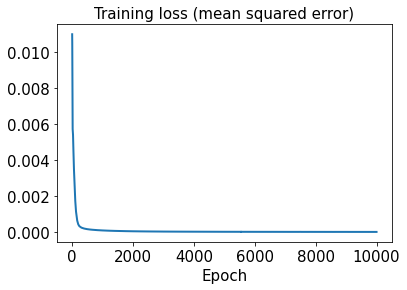

In [27]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

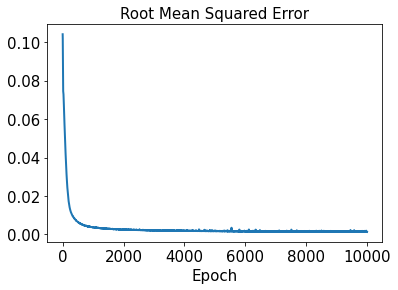

In [28]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [29]:
test_results = sd.evaluate(x_train)

13/13 [==============================] - 0s 1ms/step - loss: 2.1248e-05 - rmse: 0.0000e+00


In [30]:
decoded_train = sd.predict(x_train)

In [31]:
decoded_test = sd.predict(x_test)

In [32]:
error_train_abs = np.abs(decoded_train - y_train)

In [33]:
error_test_abs = np.abs(decoded_test - y_test)

In [34]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.00020090447


In [35]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.0056228926


In [36]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
#print(l2_error_train_list)

In [37]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
#print(l2_error_test_list)

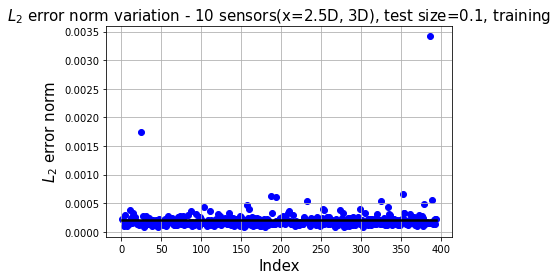

In [38]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 10 sensors(x=2.5D, 3D), test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

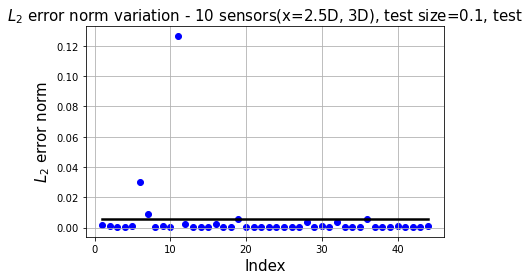

In [39]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 10 sensors(x=2.5D, 3D), test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

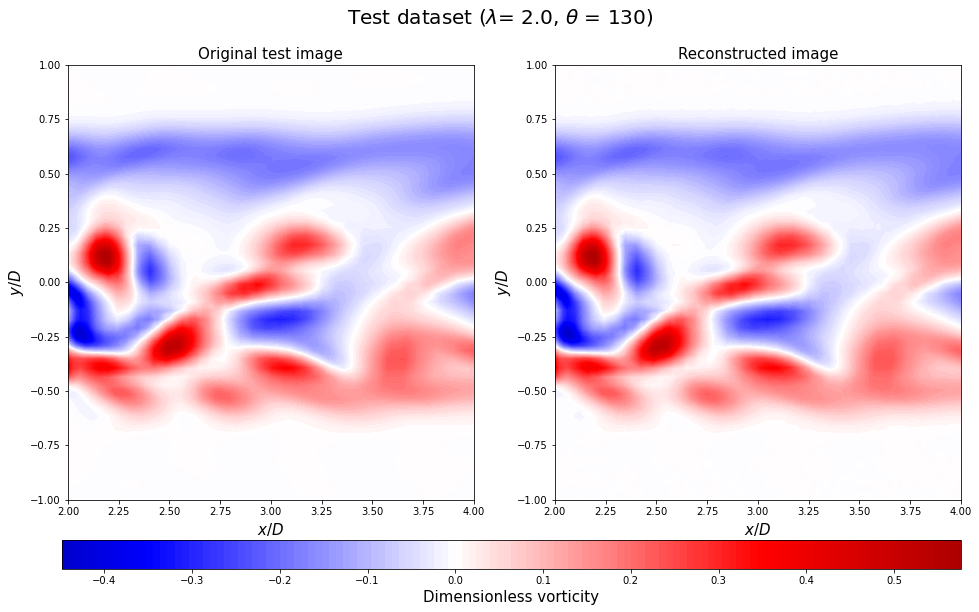

In [40]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

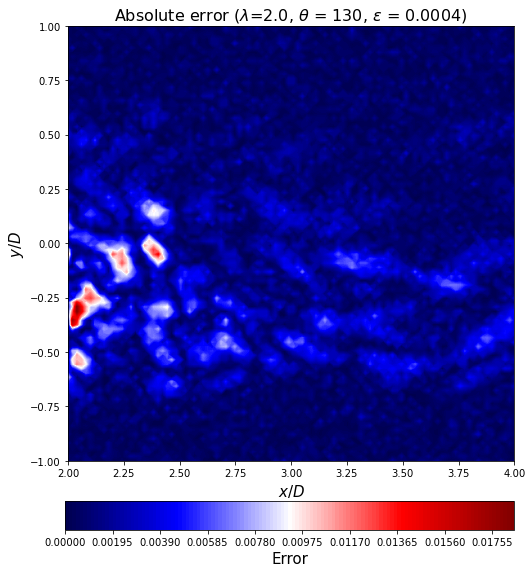

In [41]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()